

# Yolov7 - Detección de Jugadores de Fútbol
Curso: Redes Neuronales y Aprendizaje Profundo (2024-2 A)

Grupo 1 - Integrantes:

1.   Alejos Yarasca Fiorella Andrea (fiorella.alejos.y@uni.pe)
2.   Llana Chavez Walter Rodolfo (walter.llana.c@uni.pe)
3.   Luna Jaramillo Juan Marcos (juan.luna.j@uni.pe)
4.   Medina Rodríguez Henry (hmedinar@uni.pe)
5.   Salazar Vega Edwin Martín (edwin@iartificial.io)


## Descarga del codigo fuente yolo v

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 43.64 MiB/s, done.
Resolving deltas: 100% (520/520), done.
/yolov7


## Descargar data de entrenamiento y de validación - Football Player

In [ ]:
%cd data
%mkdir football-player
!curl -L "https://universe.roboflow.com/ds/ZWu76cSjXv?key=TZEkpGXwIT" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd /content/yolov7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   911  100   911    0     0   4034      0 --:--:-- --:--:-- --:--:--  4048
100 64.2M  100 64.2M    0     0   115M      0 --:--:-- --:--:-- --:--:--  115M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/08fd33_3_6_png.rf.bee65249830b3e263ebe95a999f39e34.jpg  
 extracting: test/images/08fd33_9_3_png.rf.f5439a0d252bbf8a8ce96169744b49b6.jpg  
 extracting: test/images/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg  
 extracting: test/images/42ba34_1_5_png.rf.927d602c034ce2997f58f62a7c1245ba.jpg  
 extracting: test/images/42ba34_5_5_png.rf.f691b18c36a92663c7241c99d4202bcc.jpg  
 extracting: test/images/4b770a_1_4_png.rf.8a0f6be9776a652d40938181f60b3a6c.jpg  
 extractin

In [ ]:
## Adaptación - Edición del archivo /content/yolov7/data/football-player/data.yaml
#train: data/football-player/train/images
#val: data/football-player/valid/images
#test: data/football-player/test/images

## Entrenamiento

In [28]:
!python train.py --epochs 100 --workers 8 --device 0 --batch-size 16 --data data/football-player/data.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights '' --name yolov7-football --hyp data/hyp.scratch.p5.yaml

2024-10-06 22:42:18.114828: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 22:42:18.132871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 22:42:18.154243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 22:42:18.160759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 22:42:18.176636: I tensorflow/core/platform/cpu_feature_guar

## Test

In [29]:
!python test.py --data data/football-player/data.yaml --img 640 --batch 16 --conf 0.001 --iou 0.65 --device 0 --weights runs/train/yolov7-football14/weights/best.pt --name yolov7-football_640_val

Namespace(weights=['runs/train/yolov7-football14/weights/best.pt'], data='data/football-player/data.yaml', batch_size=16, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7-football_640_val', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.8125MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functi

## Validación

In [44]:
!python detect.py --weights runs/train/yolov7-football14/weights/best.pt --conf 0.25 --img-size 640 --source /content/yolov7/data/football-player/valid/images/08fd33_3_1_png.rf.894a7edd6b726ed886b3777ea55d6beb.jpg

Namespace(weights=['runs/train/yolov7-football14/weights/best.pt'], source='/content/yolov7/data/football-player/valid/images/08fd33_3_1_png.rf.894a7edd6b726ed886b3777ea55d6beb.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.8125MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

In [24]:
# define helper functions to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

Imagen Original


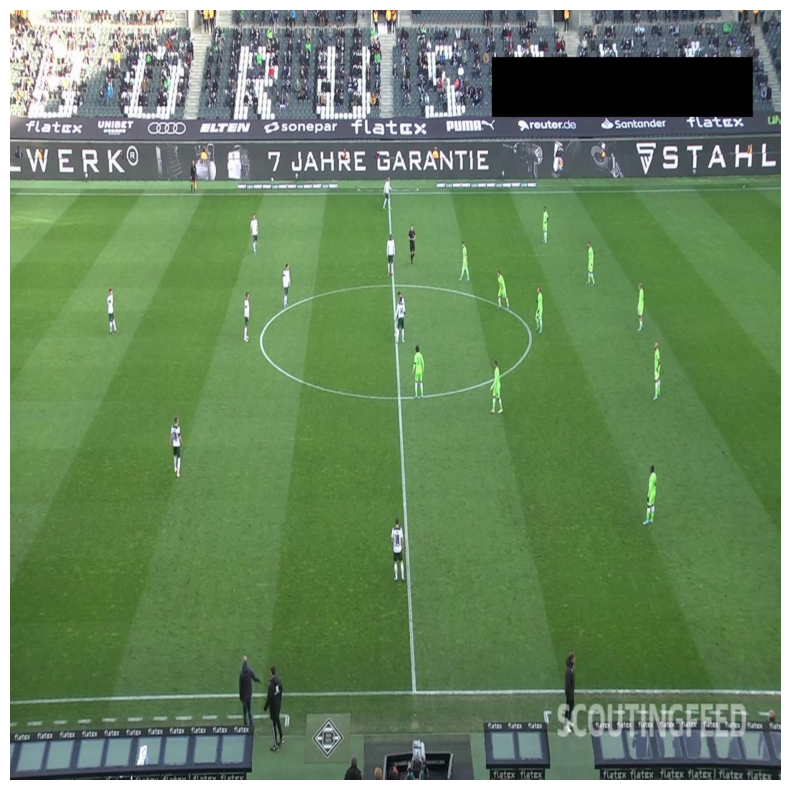


Imagen luego de aplicar el modelo


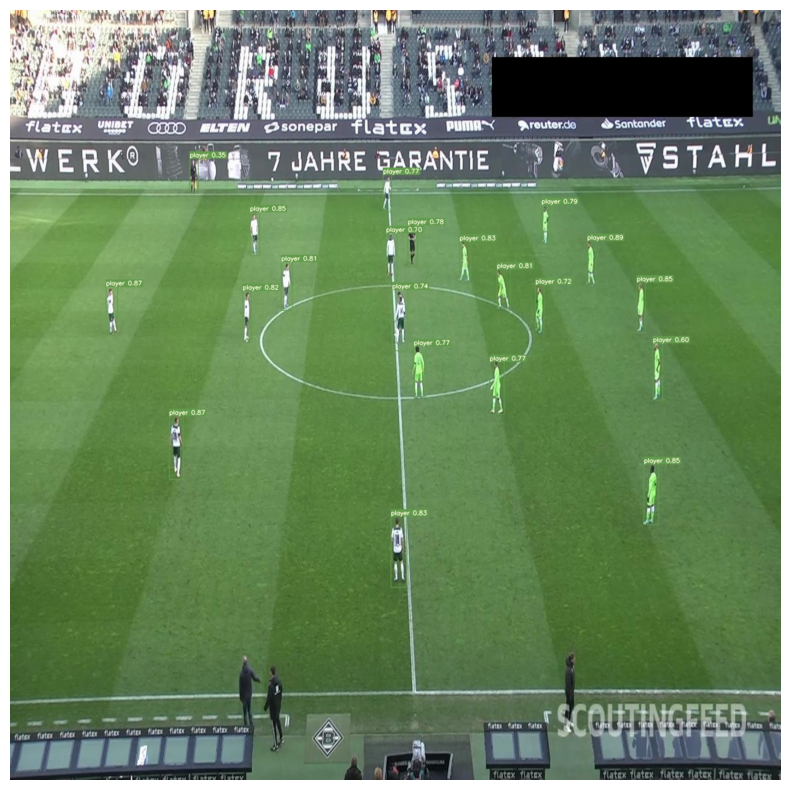

In [50]:
print("Imagen Original")
imShow("/content/yolov7/data/football-player/valid/images/08fd33_3_1_png.rf.894a7edd6b726ed886b3777ea55d6beb.jpg")
print("\nImagen luego de aplicar el modelo")
imShow("runs/detect/exp9/08fd33_3_1_png.rf.894a7edd6b726ed886b3777ea55d6beb.jpg")